<a href="https://colab.research.google.com/github/KrishKanojia/Data-Science-Practice/blob/main/Fashion_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
import os

zip_file_path = '/content/drive/MyDrive/women-fashion.zip'
extraction_directory = '/content/women_fashion/'

if not os.path.exists(extraction_directory):
  os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extraction_directory)

extraction_dir_updated = os.path.join(extraction_directory, 'women fashion')
extracted_files = os.listdir(extraction_dir_updated)
extracted_files[:10]

['black dress with lace detailing.jpg',
 'bright red kurta with an intricate patterned design.jpg',
 'Anarkali suit with fitted bodice with a high neckline.jpg',
 'tight-fitting, off-the-shoulder white dress.webp',
 'Sleeveless-Ruched-Tight-Fashion-Sexy-Bodycon-Party-Women-Club-Dresses.webp',
 'Anarkali suit with a modern twist.jpg',
 'short, blue floral dress with long puffed sleeves.jpg',
 'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
 'glamorous two-piece outfit featuring a sequined design.jpeg',
 'red velvet sheath midi dress.jpg']

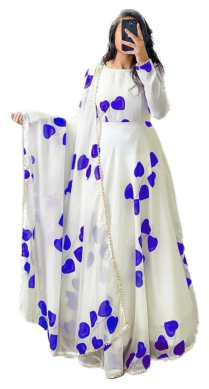

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display_image(file_path):
  image = Image.open(file_path)
  plt.imshow(image)
  plt.axis('off')
  plt.show()

# Load the first image from extracted directory
first_image_path = os.path.join(extraction_dir_updated, extracted_files[5])
display_image(first_image_path)

In [ ]:
import glob

image_directory = "/content/women_fashion/women fashion"

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpeg', '.jpg', '.png', 'webp'))]

image_paths_list[:5]

['/content/women_fashion/women fashion/black dress with lace detailing.jpg',
 '/content/women_fashion/women fashion/bright red kurta with an intricate patterned design.jpg',
 '/content/women_fashion/women fashion/Anarkali suit with fitted bodice with a high neckline.jpg',
 '/content/women_fashion/women fashion/tight-fitting, off-the-shoulder white dress.webp',
 '/content/women_fashion/women fashion/Sleeveless-Ruched-Tight-Fashion-Sexy-Bodycon-Party-Women-Club-Dresses.webp']

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
  img = image.load_img(img_path, target_size=(244,244))
  img_array = image.img_to_array(img)
  img_array_expanded = np.expand_dims(img_array, axis=0)
  return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
  features = model.predict(preprocessed_img)
  flattened_features = features.flatten()
  normalized_features = flattened_features / np.linalg.norm(flattened_features)
  return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
  preprocessed_img = preprocess_image(img_path)
  features = extract_features(model, preprocessed_img)
  all_features.append(features)
  all_image_names.append(os.path.basename(img_path))

In [ ]:
all_features[0].shape

(25088,)

In [ ]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
  # preprocess the input image and extract feature
  preprocessed_img = preprocess_image(input_image_path)
  input_features = extract_features(model, preprocessed_img)

  # calculate similarities and find the top N similar images
  similarities = [1 - cosine(input_features, other_features) for other_features in all_features]
  similar_indices = np.argsort(similarities)[-top_n:]

  # Remove the input image index from similar_indices
  similar_indices = [idx for idx in similar_indices if all_image_names.index(input_image_path) != idx ]

  # Display input image
  plt.figure(figsize=(15, 10))
  plt.subplot(1, top_n +1, 1)
  plt.imshow(Image.open(input_image_path))
  plt.title("Input Image")
  plt.axis('off')

  # Display similar images
  for i, idx in enumerate(reversed(similar_indices[:top_n]), start=1):
    image_path = os.path.join("/content/women_fashion/women fashion", all_image_names[idx])
    plt.subplot(1, top_n+1, i+1)
    plt.imshow(Image.open(image_path))
    plt.title(f"Recommendation {i}\nSimilarity {similarities[idx]:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 49ms/step


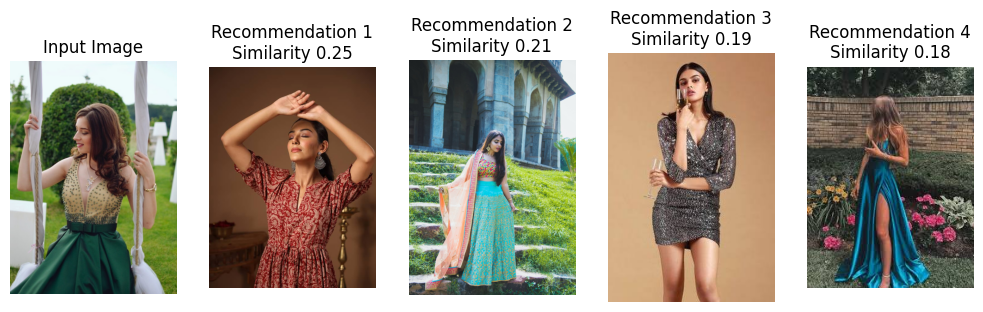

In [ ]:
input_image_path = '/content/women_fashion/women fashion/beige top adorned with black dots and a green skirt.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=5)